# TABLE OF CONTENTS


1.   IMPORTING PACKAGES
2.   LOADING DATA
3.   DESCRIPTION OF DATA ATTRIBUTES
4.   PLOTTING DATA
    *   CATEGORICAL DATA
    *   CONTINUOUS DATA
5.   DATA CORRELATIONS AND HEATMAP
6.   MODEL TRAINING
7.   PREDICTIVE ANALYTICS
8.   ACCURACY OF THE TRAINING
9.   CONFUSION MATRIX
10.   PREDICTING PRESENCE OF HEART DISEASE FROM NEW DATA



# 1. IMPORTING PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 2. LOADING DATA

In [ ]:
data = pd.read_csv('EDM.csv')
data

,SEX,YLV,STE,ASN,AHS,ASH,TRA,FMI,WKA,FEA,MEA,FCE,MCE,PMS,FAM,FLN,APG,AFG
0,0,4,1,2,0,0,0,1,1,3,3,0,2,0,2,0,4,4
1,0,4,1,1,0,2,0,1,2,3,2,2,2,1,4,0,3,3
2,1,4,1,1,0,1,0,3,0,3,3,0,1,0,2,0,4,4
3,0,4,1,2,0,0,0,2,1,3,2,0,2,0,2,0,3,3
4,1,1,1,1,0,0,2,3,0,4,4,0,1,0,2,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,4,1,2,1,1,0,2,1,3,3,0,0,0,2,0,3,3
68,1,4,1,0,0,0,2,1,1,2,3,0,1,0,2,0,3,3
69,1,4,1,1,0,0,2,2,3,3,3,0,0,0,2,0,3,3
70,1,4,1,1,1,2,1,3,1,3,3,0,0,0,2,0,4,3


# 3. DESCRIPTION OF DATA ATTRIBUTES

In [ ]:
data.describe()


,SEX,YLV,STE,ASN,AHS,ASH,TRA,FMI,WKA,FEA,MEA,FCE,MCE,PMS,FAM,FLN,APG,AFG
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.680556,3.972222,0.777778,1.583333,0.458333,0.652778,0.875000,1.708333,1.041667,2.805556,2.736111,0.25000,0.888889,0.152778,1.944444,0.041667,0.527778,0.291667
std,0.469533,1.393872,0.418657,0.726752,0.603686,0.695250,1.047297,0.984922,0.637723,0.619834,0.581234,0.66608,0.972228,0.399285,0.553831,0.201229,0.502731,0.457719
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.250000,1.000000,3.000000,3.000000,0.00000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,1.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.00000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000


# 4. DATA PLOTTING

In [ ]:
categorial = [('sex', ['Female', 'Male']),
              ('cp', ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']),
              ('fbs', ['Fasting Blood Sugar (fbs) > 120mg', 'fbs < 120mg']),
              ('restecg', ['Normal', 'ST-T Wave', 'Hypertophy']),
              ('exang', ['No', 'Yes']),
              ('slope', ['Upsloping', 'Flat', 'Downsloping']),
              ('thal', ['Normal', 'Fixed Defect', 'Reversible Defect'])]
continuous = [('trestbps', 'Blood Pressure in mmHg'),
              ('chol', 'Serum Cholestoral in mg/dL'),
              ('thalach', 'Maximum Heart Rate Achieved'),
              ('oldpeak', 'ST Depression by Exercise Relative to Rest'),
              ('ca', 'Number of Major Vessels: (0-4) Colored by Flourosopy')]


def plotTarget():
    sns.countplot(x='target', data=data, ax=ax)

    for i, p in enumerate(ax.patches):
        count = data['target'].value_counts().values[i]
        x = p.get_x() + p.get_width() /2.
        y = p.get_height() + 3
        label = '{:1.2f}'.format(count / float(data.shape[0]))

        ax.text(x, y, label, ha='center')

def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['without Heart Disease', 'with Heart Disease']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='Age', ylabel='Distribution')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='Disease Probability')

    plt.clf()

def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='Distribution')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])


def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

**Plotting Age**

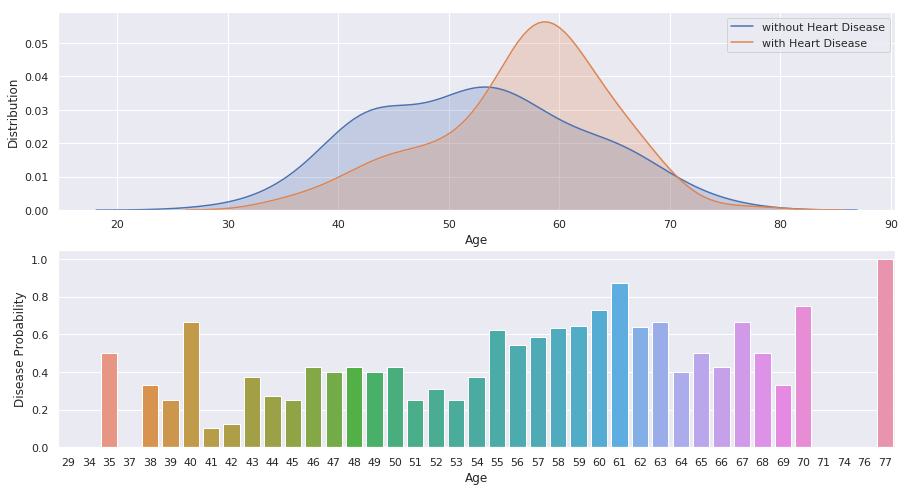

<Figure size 216x216 with 0 Axes>

In [ ]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
plotAge()

**For Categorical Data**

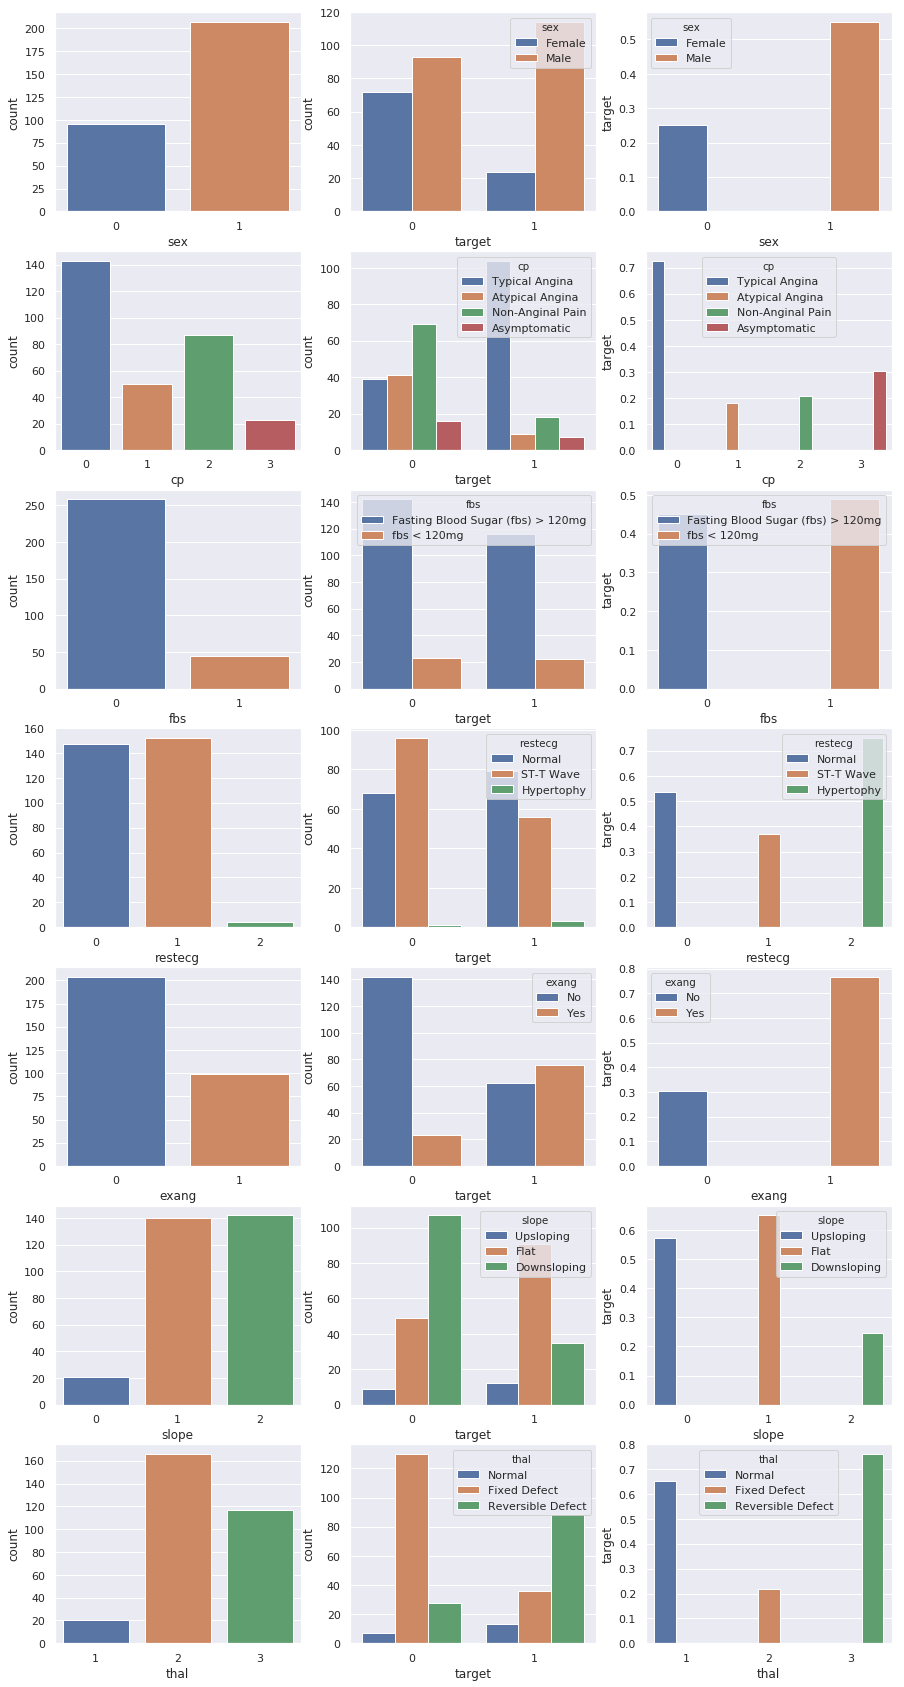

In [ ]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

**For Continuous Data**

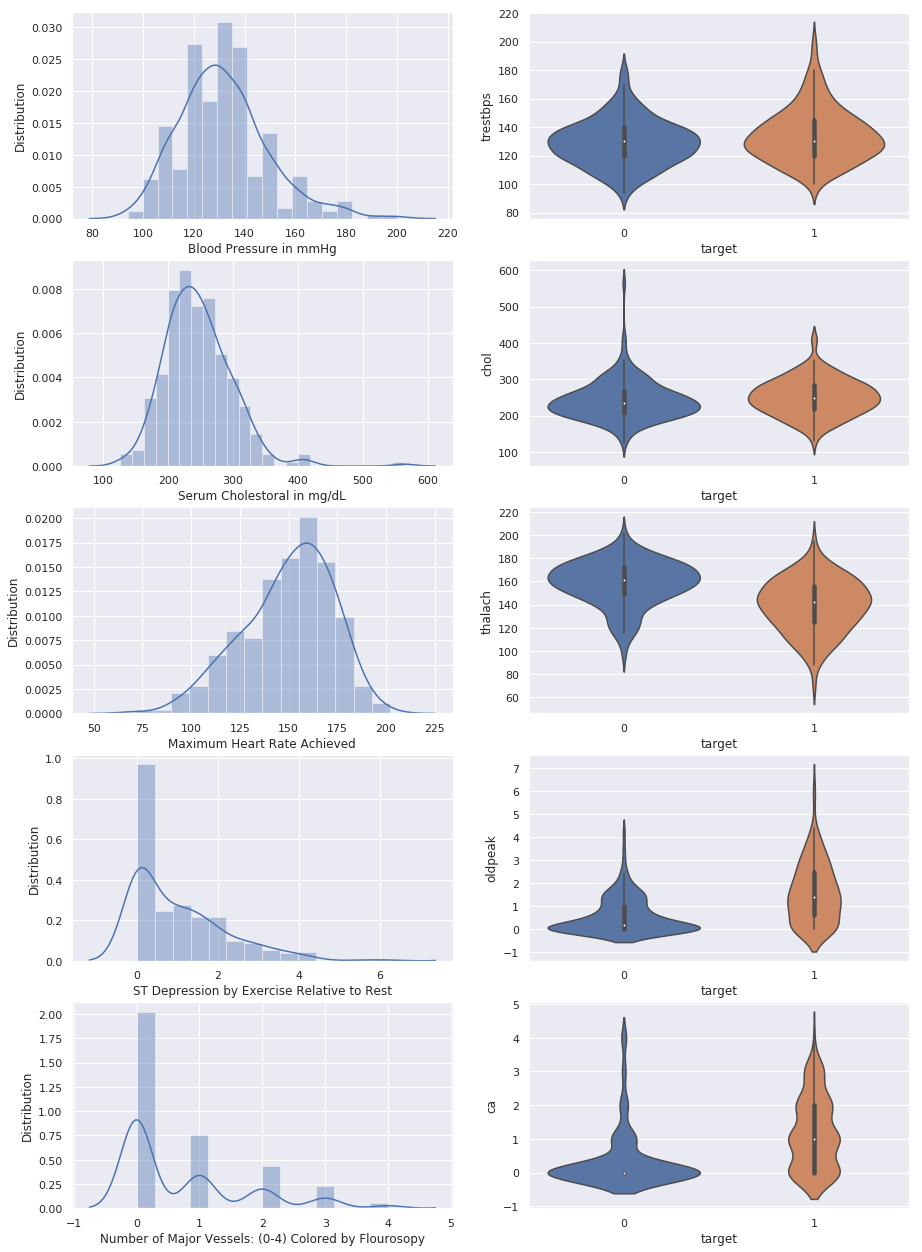

In [ ]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# 5. DATA CORRELATIONS

In [ ]:
data.corr()

,SEX,YLV,STE,ASN,AHS,ASH,TRA,FMI,WKA,FEA,MEA,FCE,MCE,PMS,FAM,FLN,APG,AFG
SEX,1.000000,-0.250475,-0.151261,-0.271728,0.076605,0.000599,0.060865,0.252531,-0.143072,0.170727,0.151243,-0.011259,-0.047995,0.113733,0.039117,-0.006211,0.116367,-0.079360
YLV,-0.250475,1.000000,0.061680,-0.108913,-0.068347,-0.024627,-0.320805,0.065830,0.048855,-0.022642,-0.252562,-0.053096,-0.085455,-0.144108,-0.166231,0.104613,-0.326724,0.297609
STE,-0.151261,0.061680,1.000000,0.108012,-0.204335,0.021506,-0.160614,0.079700,-0.070338,-0.114583,-0.128623,0.101015,0.076896,-0.046809,-0.053995,0.111456,0.026499,0.100819
ASN,-0.271728,-0.108913,0.108012,1.000000,0.024077,0.072010,-0.050888,-0.034434,0.037987,-0.213655,-0.063907,0.043644,0.112957,-0.262908,-0.058321,0.024077,0.080143,0.100729
AHS,0.076605,-0.068347,-0.204335,0.024077,1.000000,0.451628,-0.019493,-0.127323,0.205789,0.166246,0.028433,0.061297,-0.127986,-0.119298,0.077232,-0.159420,-0.023431,-0.227779
ASH,0.000599,-0.024627,0.021506,0.072010,0.451628,1.000000,-0.234538,-0.005999,0.128389,-0.060827,-0.160231,0.068432,-0.057880,-0.009161,0.132088,-0.197150,-0.145607,-0.139917
TRA,0.060865,-0.320805,-0.160614,-0.050888,-0.019493,-0.234538,1.000000,0.073392,0.007908,0.092212,0.268976,0.085809,0.013833,0.012630,-0.109271,-0.108601,0.045285,-0.133186
FMI,0.252531,0.065830,0.079700,-0.034434,-0.127323,-0.005999,0.073392,1.000000,-0.025227,0.321070,0.281910,-0.273731,-0.137280,0.114904,-0.004303,0.204309,-0.130943,-0.049216
WKA,-0.143072,0.048855,-0.070338,0.037987,0.205789,0.128389,0.007908,-0.025227,1.000000,-0.014846,-0.159908,-0.157499,-0.128727,0.085274,0.166158,-0.233227,-0.181358,-0.100830
FEA,0.170727,-0.022642,-0.114583,-0.213655,0.166246,-0.060827,0.092212,0.321070,-0.014846,1.000000,0.324701,0.119401,-0.083101,0.064813,-0.113969,0.178792,-0.085018,-0.103208


**Heatmap of correlations**

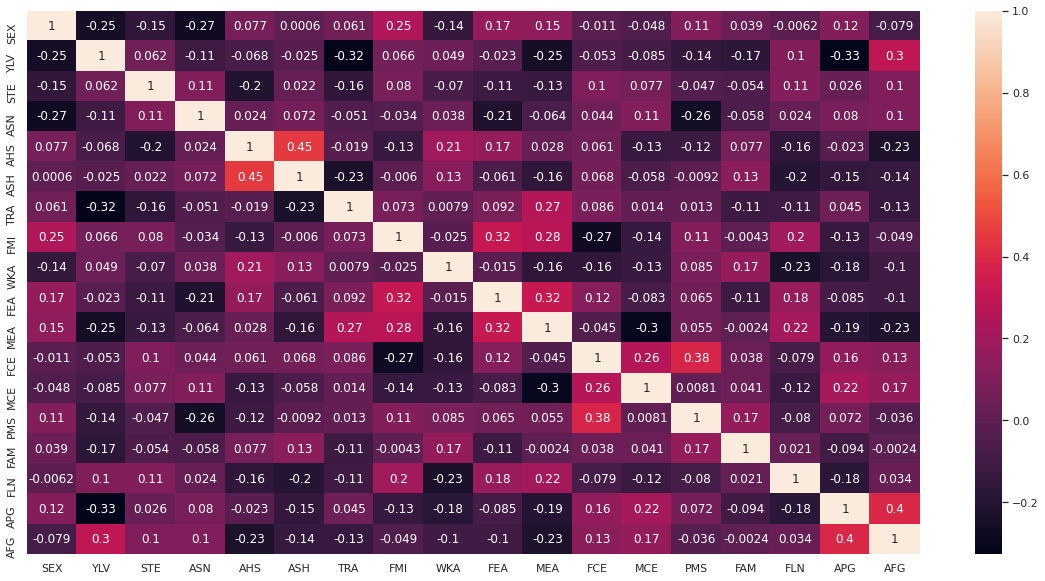

In [ ]:
sns.heatmap(data.corr(), annot = True)

# 6. MODEL TRAINING

In [ ]:
# Listing the features
features = ['SEX', 'YLV',	'STE',	'ASN',	'AHS',	'ASH',	'TRA',	'FMI',	'WKA',	'FEA',	'MEA',	'FCE',	'MCE',	'PMS',	'FAM',	'FLN',	'APG']
X = data[features]
y = data['AFG']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 21)

# 7. PREDICTIVE ANALYTICS

**For training model**

In [ ]:
random_forest_train = RandomForestClassifier()
random_forest_train.fit(X_train, y_train)
training_accuracy = random_forest_train.score(X_train, y_train)
y_pred = random_forest_train.predict(X_train)


**For testing model**

In [ ]:
random_forest_test = RandomForestClassifier()
random_forest_test.fit(X_test, y_test)
testing_accuracy = random_forest_test.score(X_test, y_test)
y_predtest = random_forest_test.predict(X_test)

# 8. ACCURACY OF THE DATA

In [ ]:
training_accuracy


1.0

In [ ]:
testing_accuracy

1.0

# 9. CONFUSION MATRIX (Train Data and Test Data)



In [ ]:
cf_training = confusion_matrix(y_train, y_pred)
cf_training

array([[ 3,  0,  0],
       [ 1, 10, 14],
       [ 0,  0,  8]])

In [ ]:
cftest = confusion_matrix(y_test, y_predtest)
cftest

array([[ 2,  0,  0,  0],
       [ 0, 21,  0,  0],
       [ 0,  0, 12,  0],
       [ 0,  0,  0,  1]])

# 10. PREDICTING ON NEW PATIENT

In [ ]:
age = int(input('Age: '))
sex = int(input("Gender (type '1' if Male, '0' if Female): "))
cp = int(input('Chest Pain type (0-4): '))
restecg = int(input('Resting Electrocardiographic Results (0 = normal; 1 = having ST-T; 2 = hypertrophy): '))
exang = int(input('Exercise Induced Angina (1 = yes; 0 = no): '))
oldpeak = float(input('ST Depression Induced by Exercise Relative to Rest: '))
slope = int(input('Slope of the Peak Exercise ST Segment (1 = upsloping; 2 = flat; 3 = downsloping): '))
ca = int(input('Number of Major Vessels (0-4) Colored by Flourosopy: '))
thal = int(input('1 = Normal; 2 = Fixed Defect; 3 = Reversable Defect: '))

patient = [[age,sex,cp,restecg,exang,oldpeak,slope,ca,thal]]
if random_forest_train.predict(patient)  == 1:
  print('Heart Disease Detected')
if random_forest_train.predict(patient) == 0:
  print('No Heart Disease Detected')

Age: 63
Gender (type '1' if Male, '0' if Female): 1
Chest Pain type (0-4): 2
Resting Electrocardiographic Results (0 = normal; 1 = having ST-T; 2 = hypertrophy): 0
Exercise Induced Angina (1 = yes; 0 = no): 0
ST Depression Induced by Exercise Relative to Rest: 0
Slope of the Peak Exercise ST Segment (1 = upsloping; 2 = flat; 3 = downsloping): 3
Number of Major Vessels (0-4) Colored by Flourosopy: 0
